# Twitter sentiment analysis

In [1]:
import pandas as pd

COLUMNS  = ['target', 'id', 'date', 'flag', 'user', 'text']

# Reading data with appropriate encoding
data = pd.read_csv('twitter_data.csv', encoding='iso8859_2', names=COLUMNS)

In [2]:
# What the data looks like
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Types and shape

In [3]:
data.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [4]:
data.shape

(1600000, 6)

### Target value

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data['target'], order=data['target'].value_counts().index)
plt.show()

<Figure size 640x480 with 1 Axes>

The variable is balanced.

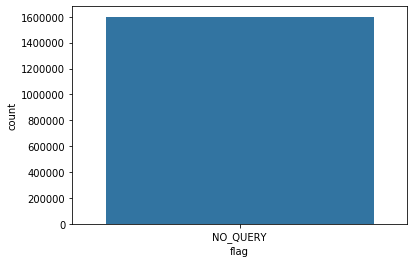

In [6]:
sns.countplot(data['flag'], order=data['flag'].value_counts().index)
plt.show()

In [7]:
text, target = list(data['text']), list(data['target'])

In [8]:
import re

pattern_nick = re.compile(r'@[^\s]+')
pattern_http = re.compile(r'http:\/\/[^ ]+')
pattern_www = re.compile(r'www\.[^ ]+')
pattern_number = re.compile(r'[0-9]+')
pattern_signs = re.compile(r'[%,.!?-]')
pattern_letters = re.compile(r'[^a-zA-Z]')

In [9]:
from nltk.stem import WordNetLemmatizer 
import nltk

lemmatizer = WordNetLemmatizer() 

In [10]:
from nltk.stem import PorterStemmer 

ps = PorterStemmer()

In [11]:
text[:5]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]

In [12]:
# from nltk.corpus import stopwords

In [13]:
tweets = []

for tweet in text:
    tweet = tweet.lower()
    tweet = re.sub(pattern_nick, 'nick', tweet)
    tweet = re.sub(pattern_http, 'www', tweet)
    tweet = re.sub(pattern_www, 'www', tweet)
    tweet = re.sub(pattern_number, '', tweet)
    tweet = re.sub(pattern_signs, '', tweet)
    
    tweet = tweet.split()
    lemmatizer_tweet = ''
    for word in tweet: 
#         if word not in set(stopwords.words('english')):
        lemmatizer_word = lemmatizer.lemmatize(word)
        stem_word = ps.stem(lemmatizer_word)
        lemmatizer_tweet += stem_word + ' '
    tweets.append(lemmatizer_tweet)

In [14]:
tweets[:5]

["nick www awww that' a bummer you shoulda got david carr of third day to do it ;d ",
 "is upset that he can't updat hi facebook by text it and might cri a a result school today also blah ",
 'nick i dive mani time for the ball manag to save the rest go out of bound ',
 'my whole bodi feel itchi and like it on fire ',
 "nick no it' not behav at all i'm mad whi am i here becaus i can't see you all over there "]

### Negative words cloud

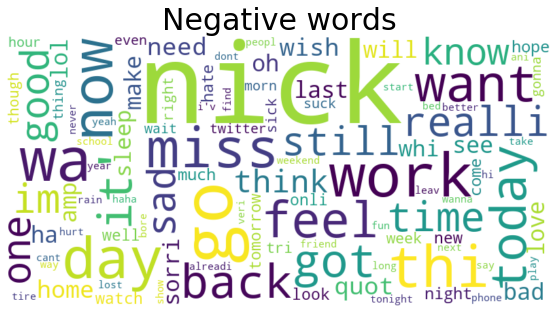

In [15]:
from wordcloud import WordCloud

negative_tweets = tweets[:800000]
plt.figure(figsize=(15,5))
wordcloud = WordCloud(background_color="white", height=400, width=800, max_words = 100, 
                      collocations=False).generate(" ".join(negative_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative words', {'fontsize': 30})
plt.axis("off")
plt.show()

### Positive words cloud

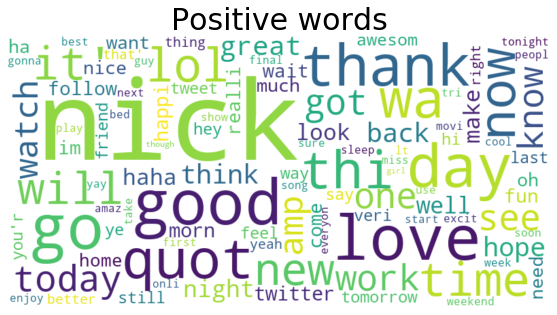

In [16]:
from wordcloud import WordCloud

positive_tweets = tweets[800000:]
plt.figure(figsize=(15,5))
wordcloud = WordCloud(background_color="white", height=400, width=800, max_words=100, 
                      collocations=False).generate(" ".join(positive_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive words', {'fontsize': 30})
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets, target, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0,
                max_features=500000, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [19]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [20]:
from sklearn.naive_bayes import BernoulliNB

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2, binarize=0.0, class_prior=None, fit_prior=True)

In [21]:
y_pred = BNBmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79    159494
           4       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [23]:
tekst = ['I hate monday', 'good']

tekst  = vectoriser.transform(tekst)
BNBmodel.predict(tekst)

array([0, 4])